# Primate Hand Proportions

![](images/handproportions_plot.png)

The data underlying this plot are included in the supplementary material of the paper and have been extracted and made available in my bioanth datasets repository.

## Preliminaries

First, I always change the R option for importing strings (I find that the default convert to factor causes more problems than it solves).

In [5]:
options(stringsAsFactors=F)

Next, import the data. The resulting data frame has five variables: status (extant or extinct), taxon, pCARP (proportion that is the carpus), pMC3 (proportion that is metacarpal 3), pD3 (proportion that is the phalanges; excluding the terminal phalange).

In [6]:
dataurl = "https://raw.githubusercontent.com/ryanraaum/bioanth-datasets/master/raw/primatehandproportions.csv"
dset = read.csv(url(dataurl), row.names=1)
str(dset)

'data.frame':	53 obs. of  5 variables:
 $ status: chr  "Extant" "Extant" "Extant" "Extant" ...
 $ taxon : chr  "Lorisoidea" "Lorisoidea" "Lorisoidea" "Lorisoidea" ...
 $ pCARP : num  19.1 19.5 16.6 17.7 15.1 13.9 16.2 14 15.8 15.5 ...
 $ pMC3  : num  23.7 24.6 23.8 23.3 24.5 24.2 27.2 27 26.6 28.2 ...
 $ pD3   : num  57.2 55.9 59.6 59.1 60.4 61.9 56.4 59 57.6 56.3 ...


The published plot has different colors and shapes for different taxonomic groups, so it will be useful to have mappings and variables for those.

In [7]:
groups = unique(dset$taxon)
groups

[1] "Lorisoidea"   "Lemuroidea"   "Tarsius"      "Platyrrhini"  "Catarrhini"  
[6] "Ptilocercus"  "Tupaia"       "Cynocephalus" "Euprimates"

In the listing above, "Euprimates" is the group for the fossil early primates.

To generate the point fill color, shape, and size variables, I first create mapping vectors.

In [47]:
map_colors = c("darkgoldenrod1", "tomato3", "mediumpurple3", "mediumseagreen", 
                 "dodgerblue3", "yellow", "orange", "white", "black")
names(map_colors) = groups

map_shapes = c(21, 21, 23, 22, 22, 24, 24, 24, 21)
names(map_shapes) = groups

map_sizes = c(1, 1, 0.75, 1.5, 1.5, 0.75, 0.75, 0.75, 1)
names(map_sizes) = groups

map_colors
map_shapes
map_sizes

Lorisoidea       Lemuroidea          Tarsius      Platyrrhini 
"darkgoldenrod1"        "tomato3"  "mediumpurple3" "mediumseagreen" 
      Catarrhini      Ptilocercus           Tupaia     Cynocephalus 
   "dodgerblue3"         "yellow"         "orange"          "white" 
      Euprimates 
         "black"

Lorisoidea   Lemuroidea      Tarsius  Platyrrhini   Catarrhini  Ptilocercus 
          21           21           23           22           22           24 
      Tupaia Cynocephalus   Euprimates 
          24           24           21

Lorisoidea   Lemuroidea      Tarsius  Platyrrhini   Catarrhini  Ptilocercus 
        1.00         1.00         0.75         1.50         1.50         0.75 
      Tupaia Cynocephalus   Euprimates 
        0.75         0.75         1.00

Next, variables with an entry for each data table entry.

In [51]:
point_colors = map_colors[dset$taxon]
point_shapes = map_shapes[dset$taxon]
point_sizes = map_sizes[dset$taxon]

cbind(rownames(dset), dset$taxon, point_colors, point_shapes, point_sizes)

,,,point_colors,point_shapes,point_sizes
Lorisoidea,Arctocebus calabarensis,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Loris tardigradus,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Nycticebus coucang,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Perodicticus potto,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Euoticus elegantulus,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Galago moholi,Lorisoidea,darkgoldenrod1,21,1
Lemuroidea,Cheirogaleus major,Lemuroidea,tomato3,21,1
Lemuroidea,Microcebus murinus,Lemuroidea,tomato3,21,1
Lemuroidea,Phaner sp.,Lemuroidea,tomato3,21,1
Lemuroidea,Hapalemur griseus,Lemuroidea,tomato3,21,1


Set up the annotation species and label text.

In [103]:
# Adapis needs to be placed separately
ann_species = c("D. madagascarensis", "Darwinius", "Tupaia glis", "Cynocephalus volans", "Nannodectes", 
            "Europolemur", "Godinotia", "Leptadapis", "Papio sp.")
ann_labels  = c("Daubentonia", "Darwinius", "Tupaia", "Cynocephalus", "Nannodectes",
            "Europolemur", "Godinotia", "Leptadapis", "Papio")
ann_pos     = c(4, 2, 4, 4, 4, 2, 4, 2, 4)

cbind(ann_species, ann_labels, ann_pos)

ann_species,ann_labels,ann_pos
D. madagascarensis,Daubentonia,4
Darwinius,Darwinius,2
Tupaia glis,Tupaia,4
Cynocephalus volans,Cynocephalus,4
Nannodectes,Nannodectes,4
Europolemur,Europolemur,2
Godinotia,Godinotia,4
Leptadapis,Leptadapis,2
Papio sp.,Papio,4


## Base R

Triangle plots are not specifically included in the base R graphics toolkit, but there is an implementation in the `ade4` package that is built on the standard plotting tools. 

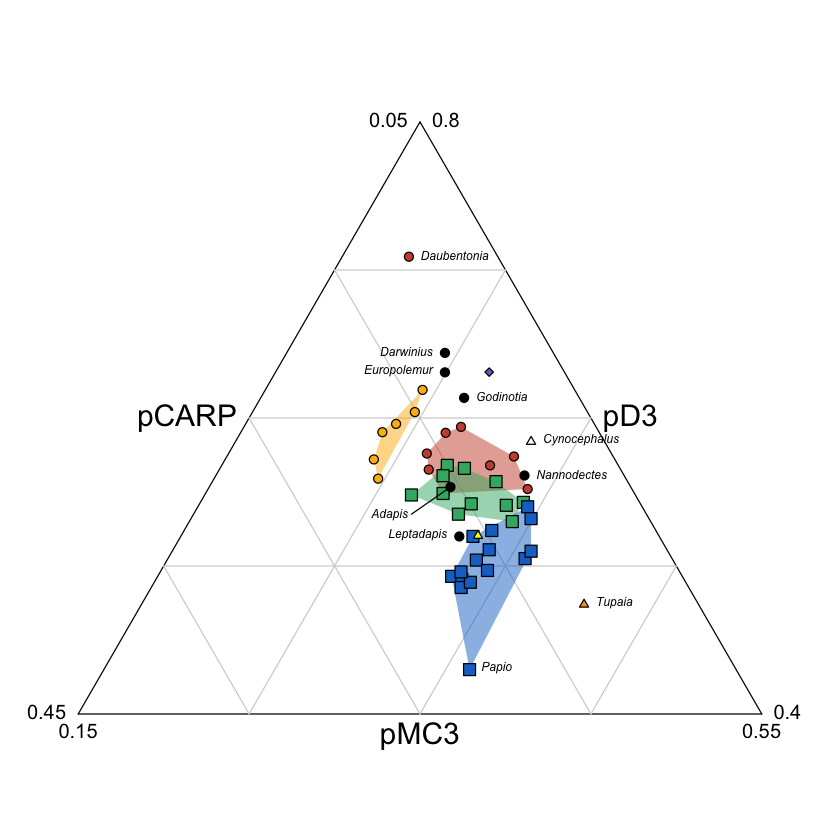

In [119]:
library(ade4)      # for the triangle.plot function
library(grDevices) # for the convex hulls

# the triangle plot invisibly returns the plot coordinates of the points
# we will need this to draw the convex hull polygons on the published plot
# as well as to style the points (no style options in the function itself)
coords = triangle.plot(dset[,c("pCARP", "pMC3", "pD3")],
                       show.position=F, # don't show position of displayed triangle in complete triangle,
                       cpoint=0,        # don't plot points yet (no point format options in this function)

                       # only doing the following to try to exactly match published plot, 
                       # not necessary otherwise
                       scale=F,             # don't autoset the axis limits
                       min3=c(.05,.15,.40), # axis minimums
                       max3=c(.45,.55,.80)  # axis maximums
                      )

# extract out the points for each group that will get a convex hull polygon
loris = coords[dset$taxon == "Lorisoidea",]
lemur = coords[dset$taxon == "Lemuroidea" & rownames(dset) != "D. madagascarensis",]
platy = coords[dset$taxon == "Platyrrhini",]
catar = coords[dset$taxon == "Catarrhini",]

# extract the points bounding the convex hull polygons
lorishp = chull(loris)
lemurhp = chull(lemur)
platyhp = chull(platy)
catarhp = chull(catar)

# add the first point to the end so that the polygon closes
lorishp = c(lorishp, lorishp[1])
lemurhp = c(lemurhp, lemurhp[1])
platyhp = c(platyhp, platyhp[1])
catarhp = c(catarhp, catarhp[1])

# plot the polygons
polygon(loris[lorishp,], col=adjustcolor(map_colors["Lorisoidea"], alpha=0.5), border=NA)
polygon(lemur[lemurhp,], col=adjustcolor(map_colors["Lemuroidea"], alpha=0.5), border=NA)
polygon(platy[platyhp,], col=adjustcolor(map_colors["Platyrrhini"], alpha=0.5), border=NA)
polygon(catar[catarhp,], col=adjustcolor(map_colors["Catarrhini"], alpha=0.5), border=NA)

# add the points with specified colors, shapes, and sizes
points(coords, pch=point_shapes, bg=point_colors, cex=point_sizes)

# add the annotations
for (i in 1:length(ann_species)) {
    xpt = coords[ann_species[i],1]
    ypt = coords[ann_species[i],2]
    text(xpt, ypt, substitute(italic(x), list(x=ann_labels[i])), pos=ann_pos[i], cex=0.6)
}

# Special placement for Adapis with a line to the point
# rather than try to figure out coordinate values, just mix and match from other points
xpt = coords["Chiropotes sp.", 1]
ypt = coords["Cebus sp.", 2]
text(xpt, ypt, expression(italic('Adapis ')), adj=1, cex=0.6)
lines(c(xpt, coords["Adapis", 1]), c(ypt, coords["Adapis", 2]))

## ggplot2

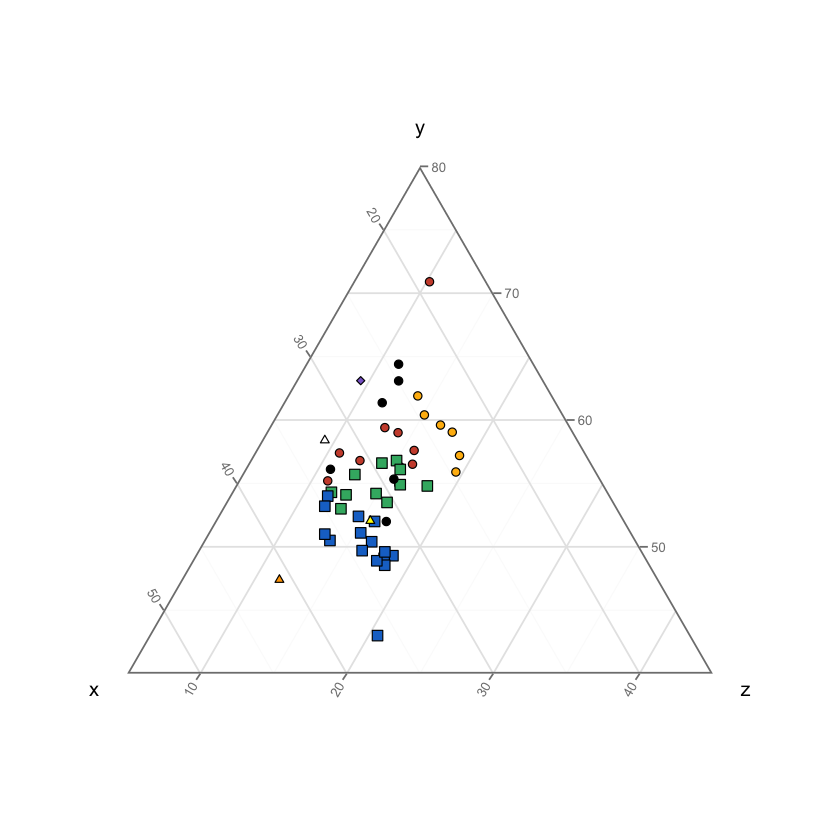

In [144]:
library(ggplot2)
library(ggtern) # ternary = triangle plot

ggdata = data.frame(z=dset$pCARP,
                    x=dset$pMC3,
                    y=dset$pD3)

plt = ggtern(data=ggdata, aes(x,y,z)) + 
        theme_minimal() + 
        tern_limits(T=.8, L=.55, R=.45) + 
        geom_point(pch=point_shapes, bg=point_colors, cex=point_sizes*2)

plt